# NN1: Bazowa implementacja
Adrianna Grudzień

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

### Wczytanie danych

In [2]:
square_simple_train = pd.read_csv("mio1/regression/square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv("mio1/regression/square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv("mio1/regression/steps-large-training.csv", index_col=0)
steps_small_test = pd.read_csv("mio1/regression/steps-large-test.csv", index_col=0)

### Funkcja aktywacji

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Definicja sieci MLP

In [4]:
class MLP:
    def __init__(self, weights_array, bias_array, input_size=1, output_size=1, activation_fun=sigmoid):
        self.weights_array = weights_array
        self.bias_array = bias_array
        self.activation_fun = activation_fun
        self.layers_size = [len(bias_array[0]), len(bias_array[1])]
        self.n_layers = len(self.weights_array)-1
        
    def forward1(self, x):
        out = self.activation_fun(np.dot(np.transpose(np.matrix(x)), np.matrix(self.weights_array[0])) + self.bias_array[0])

        #warstwy:
        for i in range(1,self.n_layers):
            weights = self.weights_array[i]
            biases = self.bias_array[i]
            out = self.activation_fun(np.dot(out, np.transpose(weights)) + biases)

        out = (np.dot(out, np.transpose(np.matrix(self.weights_array[self.n_layers]))) +
                             self.bias_array[self.n_layers])
        return out
    
    def forward2(self, x):
        out = self.activation_fun(np.c_[np.ones(x.shape[0]), x] @ 
                                            np.append(self.weights_array[0], self.bias_array[0]).reshape(2,self.layers_size[0]))
        
        for i in range(1, self.n_layers):    
            out = self.activation_fun(
                    np.c_[np.ones(out.shape[0]), out] @ np.append(self.weights_array[i], self.bias_array[i]).reshape(self.layers_size[0]+1, self.layers_size[1]))
             print(out.shape)
        out = np.c_[np.ones(out.shape[0]), out] @ np.append(self.weights_array[self.n_layers], self.bias_array[self.n_layers])
        return out

## Zbiór `square-simple`

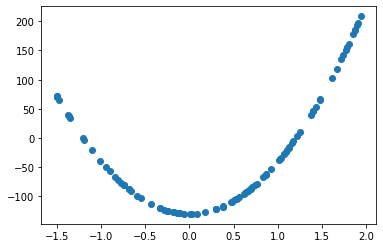

In [5]:
x = square_simple_train['x']
y = square_simple_train['y']

plt.scatter(x,y)
plt.show()

### jedna warstwa ukryta, 5 neuronów

76.69070524430248


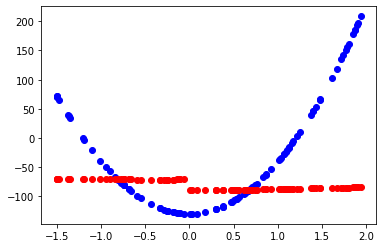

In [36]:
mlp = MLP(
    weights_array = [
        np.array([ 60,  1000,  0, -2, -2]),
        np.array([ -100, -1, 10, 10, 9])
    ],
    bias_array = [
        np.array([100, -90, -200, -100, 1.4]),
        np.array([10])
    ]
)

y_pred = mlp.forward2(x)
print(metrics.mean_absolute_error(y_pred, y))

plt.scatter(x,y, color='blue')
plt.scatter(x,np.array(y_pred.flatten()), color='red')
plt.show()

### jedna warstwa ukryta, 10 neuronów,

MSE:  51.77550625212288


<ipython-input-3-b683d5dd8fa4>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


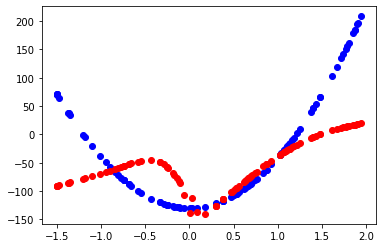

In [186]:
mlp = MLP(
    weights_array = [
        np.array([1, -1.700000001, -0.000001, -1, -1, -7.9, -20.8, -5, -5, -247]),
        np.array([22, -250, -127, -92, 150, -5.5, -100,10 ,40.56, 100])
    ],
    bias_array = [
        np.array([-2,-1,40,-8,1,-0.9,70,-100,485,-12]),
        np.array([250])
    ]
)

y_pred = mlp.forward2(x)
print('MSE: ', metrics.mean_absolute_error(y_pred, y))

plt.scatter(x,y, color='blue')
plt.scatter(x,np.array(y_pred.flatten()), color='red')
plt.show()

### dwie warstwy ukryte, po 5 neuronów każda.

MSE:  35.27852802996989


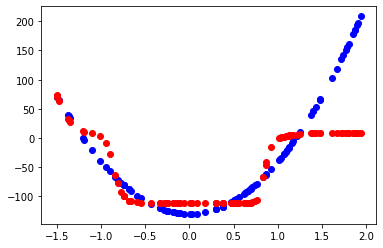

In [596]:
mlp = MLP(
    weights_array = [np.array([60 , -6, 2 , -13, -2]), 
               np.array([[ 22 , -43, 1 , -5 , 24], 
                         [ -12 , -2, 9 , 8 , 3],
                         [ -15 , -3, -5 , -20 , -5], 
                         [ 19 , -6, 11 , 14 , -6],
                         [ -4, 10 , -10, -59, 23 ]]),
               np.array([ -35 , -121 ,  39,  -35, -120])], 
    bias_array = [np.array([-12 , 8.8, 2.455, 7, -2.65]),
            np.array([-14.37975, -7, -13, -17, -12]),
           np.array([200])]
)

y_pred = mlp.forward2(x)
print('MSE: ', metrics.mean_absolute_error(y_pred, y))

plt.scatter(x,y, color='blue')
plt.scatter(x,np.array(y_pred.flatten()), color='red')
plt.show()

## Zbiór `steps-large`

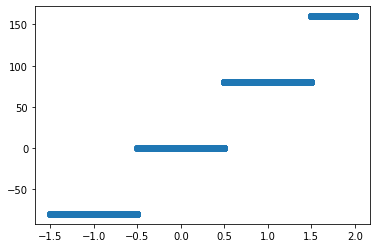

In [597]:
x = steps_small_train['x']
y = steps_small_train['y']

plt.scatter(x,y)
plt.show()

### jedna warstwa ukryta, 5 neuronów

30.342047910624952


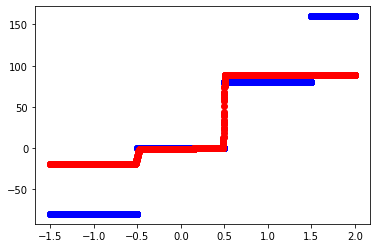

In [755]:
mlp = MLP(
    weights_array = [
        np.array([ -7, 200, 120, -150, 50]),
        np.array([ -14, 1, -16, 10, 89])
    ],
    bias_array = [
        np.array([43, 8, 32, 302, 99.99]),
        np.array([19])
    ]
)

y_pred = mlp.forward2(x)
print(metrics.mean_absolute_error(y_pred, y))

plt.scatter(x,y, color='blue')
plt.scatter(x,np.array(y_pred.flatten()), color='red')
plt.show()

### jedna warstwa ukryta, 10 neuronów

MSE:  19.782168175175123


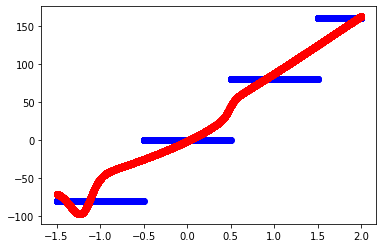

In [1083]:
mlp = MLP(
    weights_array = [
        np.array([-16, -3, 13, -1, -14., -6, -15, -12, 18, -1.99]),
        np.array([-65, -25, 7, -100, 159, -2, -102,19 ,4, 88])
    ],
    bias_array = [
        np.array([-3,8,10,1,-1,-3,31,-4,16,0.7]),
        np.array([273])
    ]
)

y_pred = mlp.forward2(x)
print('MSE: ', metrics.mean_absolute_error(y_pred, y))

plt.scatter(x,y, color='blue')
plt.scatter(x,np.array(y_pred.flatten()), color='red')
plt.show()

### dwie warstwy ukryte, po 5 neuronów każda

MSE:  24.39197801757608


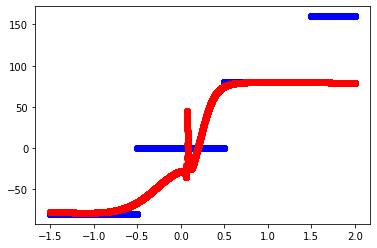

In [1428]:
mlp = MLP(
    weights_array = [np.array([7 , -2, 11 , -54, 1]), 
               np.array([[ 2 , -20, 3, 6 , 2.9], 
                         [ 27 , 1, -80 , 30 , 6 ],
                         [ -30 , -6, 35 , -7 , -6], 
                         [ -1. , -4, 1 , -20 , 5.2],
                         [ -2, -5 , -5, -4, 7 ]]),
               np.array([ -77 , -130 ,  35,  -37, -12 ])], 
    bias_array = [np.array([-107, 1.2, -2, -6, -4.001]),
            np.array([-14, 1, -16, -6, -13]),
           np.array([194.9])]
)

y_pred = mlp.forward2(x)
print('MSE: ', metrics.mean_absolute_error(y_pred, y))

plt.scatter(x,y, color='blue')
plt.scatter(x,np.array(y_pred.flatten()), color='red')
plt.show()